In [1]:
import pandas as pd

In [2]:
#Import data into Python environment.
tele=pd.read_csv(r'data\Comcast_telecom_complaints_data.csv')
tele

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [3]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
tele.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
tele['Date_month_year']=pd.to_datetime(tele['Date_month_year'])
tele['Date']=pd.to_datetime(tele['Date'])
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
m

<AxesSubplot:>

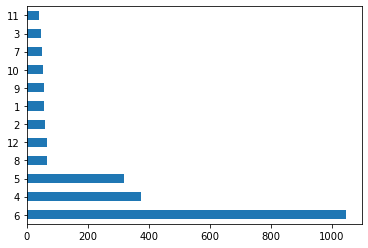

In [6]:
##Provide the trend chart for the number of complaints at monthly and daily granularity levels.
tele['month']= tele['Date_month_year'].dt.month

State=tele['month'].value_counts()
State.plot(kind='barh')

<AxesSubplot:>

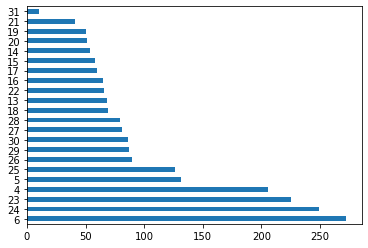

In [7]:
tele['Day'] = tele['Date_month_year'].apply(lambda x: x.day)
State=tele['Day'].value_counts()
State.plot(kind='barh')

In [8]:
## Provide a table with the frequency of complaint types.
cc=tele['Customer Complaint'].value_counts()
cc

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

In [9]:
tele['Customer Complaint'].unique()

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [10]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
tele['Status']=["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in tele["Status"]]
tele['Status'].unique()

array(['Closed', 'Open'], dtype=object)

<AxesSubplot:>

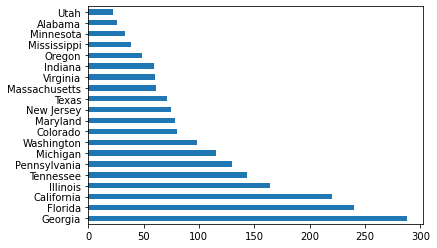

In [11]:
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
State=tele['State'].value_counts().head(20)
State.plot(kind='barh')
#Which state has the maximum complaints: Georgia

In [12]:
#Which state has the highest percentage of unresolved complaints
percentage=tele.groupby(['State','Status']).size().unstack().fillna(0)

percentage
percentage['Total']=percentage['Open']+percentage['Closed']
percentage['Per_Open']=percentage['Open']/percentage['Total']*100
percentage.sort_values(by='Per_Open', ascending=False).head(10)

Status,Closed,Open,Total,Per_Open
State,,,,
Kansas,1.0,1.0,2.0,50.000000
Kentucky,4.0,3.0,7.0,42.857143
Mississippi,23.0,16.0,39.0,41.025641
Maine,3.0,2.0,5.0,40.000000
Alabama,17.0,9.0,26.0,34.615385
Vermont,2.0,1.0,3.0,33.333333
Delaware,8.0,4.0,12.0,33.333333
New Hampshire,8.0,4.0,12.0,33.333333
Tennessee,96.0,47.0,143.0,32.867133


In [13]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
percentage=tele.groupby(['Received Via','Status']).size().unstack().fillna(0)

percentage['Total']=percentage['Open']+percentage['Closed']
percentage['Per']=percentage['Closed']/percentage['Total']*100
percentage

Status,Closed,Open,Total,Per
Received Via,,,,
Customer Care Call,864,255,1119,77.211796
Internet,843,262,1105,76.289593
